In [2]:
from ARCDR import readARCDR
import matplotlib.pyplot as plt
import numpy as np

In [3]:
hdr, adf = readARCDR("/home/indujaa/Projects/magellantools/adf01467.lbl")

/home/indujaa/Projects/magellantools/adf01467.2
parsing adf
hdr bytes =  501


In [4]:
for name in adf.dtype.names:
    print(name)

print()

for k in hdr.keys():
    print(k)

SFDU_LABEL_AND_LENGTH
FOOTPRINT_NUMBER
ALT_FLAG_GROUP
ALT_FLAG2_GROUP
ALTIMETRY_FOOTPRINT_TDB_TIME
ALT_SPACECRAFT_POSITION_VECTOR
ALT_SPACECRAFT_VELOCITY_VECTOR
ALT_FOOTPRINT_LONGITUDE
ALT_FOOTPRINT_LATITUDE
ALT_ALONG_TRACK_FOOTPRINT_SIZE
ALT_CROSS_TRACK_FOOTPRINT_SIZE
RECEIVER_NOISE_CALIBRATION
UNCORRECTED_DISTANCE_TO_NADIR
ATMOS_CORRECTION_TO_DISTANCE
DERIVED_PLANETARY_RADIUS
RADAR_DERIVED_SURF_ROUGHNESS
DERIVED_FRESNEL_REFLECTIVITY
DERIVED_FRESNEL_REFLECT_CORR
FORMAL_ERRORS_GROUP
FORMAL_CORRELATIONS_GROUP
EPHEMERIS_RADIUS_CORRECTION
EPHEMERIS_LONGITUDE_CORRECTION
EPHEMERIS_LATITUDE_CORRECTION
ALT_PARTIALS_GROUP
NON_RANGE_SHARP_FIT
SCALING_FACTOR
NON_RANGE_SHARP_LOOKS
NON_RANGE_PROF_CORRS_INDEX
NON_RANGE_SHARP_ECHO_PROF
BEST_NON_RANGE_SHARP_MODEL_TPT
RANGE_SHARP_FIT
RANGE_SHARP_SCALING_FACTOR
RANGE_SHARP_LOOKS
RANGE_SHARP_PROF_CORRS_INDEX
RANGE_SHARP_ECHO_PROFILE
BEST_RANGE_SHARP_MODEL_TMPLT
MULT_PEAK_FRESNEL_REFLECT_CORR
DERIVED_PLANETARY_THRESH_RADI
SIGNAL_QUALITY_INDICATOR
DERIVED

In [9]:
for i in range(len(adf)):
    print(adf[i]["ALT_SPACECRAFT_VELOCITY_VECTOR"])

[-3.27810703  6.25848709 -3.61136842]
[-3.27665752  6.25740547 -3.6175783 ]
[-3.27520758  6.2563206  -3.62377337]
[-3.27375775  6.25523203 -3.62995375]
[-3.27230744  6.25414009 -3.63611945]
[-3.27085732  6.25304466 -3.64227024]
[-3.26940696  6.25194563 -3.64840646]
[-3.26795649  6.2508436  -3.65452825]
[-3.26650568  6.24973832 -3.66063546]
[-3.26505483  6.24862937 -3.66672798]
[-3.26360408  6.24751722 -3.67280632]
[-3.26215305  6.24640194 -3.67887038]
[-3.26070174  6.24528344 -3.68491994]
[-3.25925087  6.24416121 -3.69095529]
[-3.25779947  6.24303634 -3.69697665]
[-3.25634815  6.24190835 -3.70298342]
[-3.2548967   6.24077671 -3.70897633]
[-3.25344519  6.23964217 -3.71495537]
[-3.25199384  6.23850444 -3.72092039]
[-3.25054253  6.23736404 -3.72687142]
[-3.24909068  6.23622054 -3.73280844]
[-3.24763929  6.23507374 -3.73873209]
[-3.24618777  6.23392439 -3.74464152]
[-3.2447362   6.23277154 -3.75053726]
[-3.24328488  6.23161629 -3.75641952]
[-3.24183332  6.23045781 -3.76228824]
[-3.24038173

In [18]:
# Window out crappy data at the end of this specific file
adf_smooth = adf[adf["FOOTPRINT_NUMBER"]==-35]
adf_rough = adf[adf["FOOTPRINT_NUMBER"]==13]

print(np.where(adf["FOOTPRINT_NUMBER"]==-35))
print(np.where(adf["FOOTPRINT_NUMBER"]==13))

(array([535]),)
(array([583]),)


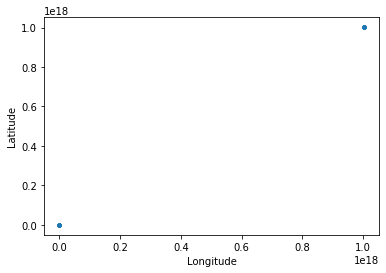

In [5]:
plt.plot(adf["ALT_FOOTPRINT_LONGITUDE"], adf["ALT_FOOTPRINT_LATITUDE"],'.')
plt.ylabel("Latitude")
plt.xlabel("Longitude")
plt.show()

In [6]:
print(len(adf["ALT_FOOTPRINT_LONGITUDE"]))

1574


In [7]:
font = {'family' : 'sans-serif',
        'sans-serif':'Arial',
        'size'   : 35}
plt.rc('font', **font)
plt.rc('axes', titlesize=45)     # fontsize of the axes title
plt.rc('axes', labelsize=45)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=35)    # fontsize of the tick labels
plt.rc('ytick', labelsize=35)    # fontsize of the tick labels
plt.rc('legend', fontsize=45)    # legend fontsize
plt.rc('legend', title_fontsize=45)    # legend fontsize
plt.rc('figure', titlesize=35)  # fontsize of the figure title

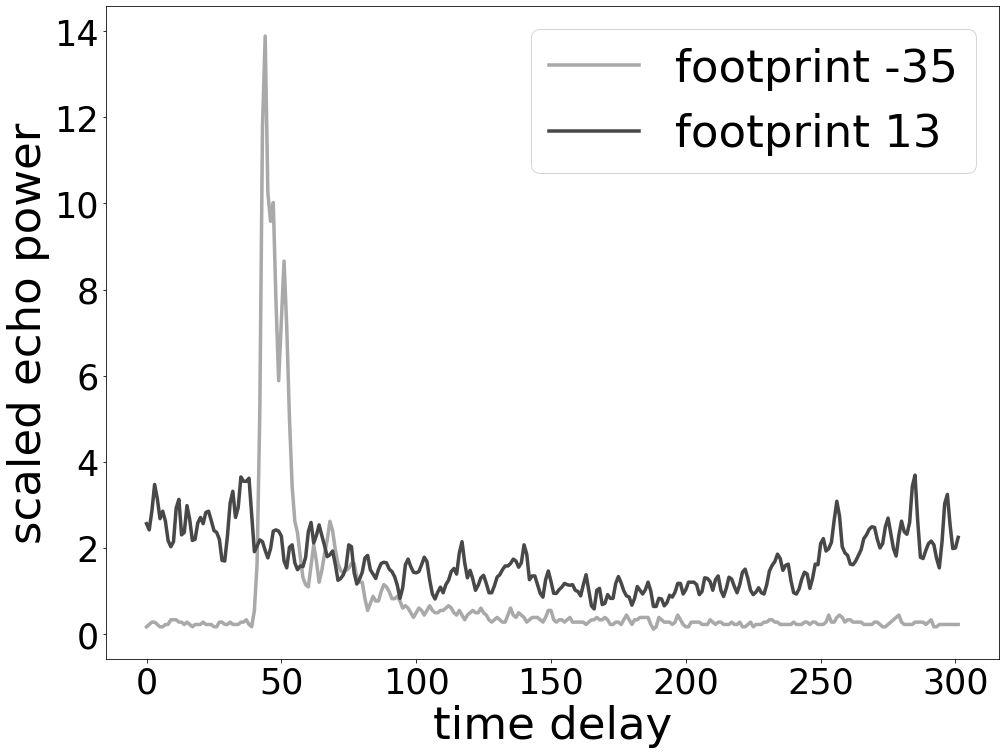

In [11]:
ech_prfl = np.zeros((2,len(adf["ALT_FOOTPRINT_LONGITUDE"])))
ech_prfl_smth =  adf["NON_RANGE_SHARP_ECHO_PROF"][535]*adf["SCALING_FACTOR"][535]
ech_prfl_rough =  adf["NON_RANGE_SHARP_ECHO_PROF"][583]*adf["SCALING_FACTOR"][583]
colors = ["#A9A9A9","#484848"]
n=0
fig, ax = plt.subplots(nrows=1, ncols=1)
for i in [535, 583]:
    ax.plot(adf["NON_RANGE_SHARP_ECHO_PROF"][i]*adf["SCALING_FACTOR"][i]/1e4, label="footprint "+str(adf["FOOTPRINT_NUMBER"][i]), c= colors[n], linewidth=3.5)
#     print("scaling factor = ", adf["SCALING_FACTOR"][i])
#     print("lat/lon = ", adf["ALT_FOOTPRINT_LONGITUDE"][i]-360, adf["ALT_FOOTPRINT_LATITUDE"][i])
#     print("footprint = ", adf["ALT_ALONG_TRACK_FOOTPRINT_SIZE"][i], adf["ALT_CROSS_TRACK_FOOTPRINT_SIZE"][i])
    n+=1
    
ax.set_xlabel("time delay")
ax.set_ylabel("scaled echo power")
plt.legend()


figure = plt.gcf()
figure.set_size_inches(16, 12)
plt.savefig("plot.png")      

In [22]:
C_sm = np.std(ech_prfl_smth)/np.mean(ech_prfl_smth)
C_ro = np.std(ech_prfl_rough)/np.mean(ech_prfl_rough)
print(C_sm, C_ro)

2.173518 0.40188184
